# SVM (Máquina de Soporte Vectorial)

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip -O dataset.zip

--2021-07-27 20:46:38--  http://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  82.21K   262KB/s    in 0.3s    

2021-07-27 20:46:39 (262 KB/s) - ‘dataset.zip’ saved [84188/84188]



In [2]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: sentiment labelled sentences/
  inflating: sentiment labelled sentences/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/sentiment labelled sentences/
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: __MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: sentiment labelled sentences/yelp_labelled.txt  
  inflating: __MACOSX/._sentiment labelled sentences  


In [3]:
import pandas as pd

import sklearn.preprocessing as skp
import sklearn.model_selection as skms
import sklearn.feature_extraction.text as sktext

import nltk

from sklearn.svm import SVC

In [4]:
data = pd.read_csv("/content/sentiment labelled sentences/amazon_cells_labelled.txt",sep="\t",header=None)
data.columns = ["texto","clase"]
data.head()

,texto,clase
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
xtrain,xtest,ytrain,ytest = skms.train_test_split(data.texto,data.clase,train_size=0.8,random_state=0)

In [6]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
lematizador = nltk.stem.WordNetLemmatizer()

In [8]:
s = "the worker has been painting the car"
tokens = nltk.word_tokenize(s)
tokens

['the', 'worker', 'has', 'been', 'painting', 'the', 'car']

In [9]:
for token in tokens:
  print(nltk.pos_tag([token]))

[('the', 'DT')]
[('worker', 'NN')]
[('has', 'VBZ')]
[('been', 'VBN')]
[('painting', 'NN')]
[('the', 'DT')]
[('car', 'NN')]


In [10]:
convertir_tipo = {
    'N':'n',
    'V':'v',
    'J':'a',
    'R':'r'
}

In [11]:
s = "the worker hasn't painted the car"
tokens = nltk.word_tokenize(s)

for token in tokens:
  llave = nltk.pos_tag(token)[0][1][0]
  lema = lematizador.lemmatize(token,convertir_tipo.get(llave,'n'))
  print(lema)

the
worker
have
n't
painted
the
car


In [12]:
def ProcesarTexto(texto):
  texto = texto.lower()
  tokens = [
            lematizador.lemmatize(
                token,
                convertir_tipo.get( nltk.pos_tag(token)[0][1][0],'n')
            )
            for token in nltk.word_tokenize(texto)
  ]
  return " ".join(tokens)

In [13]:
ProcesarTexto("the worker hasn't painted the car")

"the worker have n't painted the car"

In [14]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
svm = SVC(kernel="linear",random_state=0,probability=True)
xencoder = sktext.TfidfVectorizer(
    stop_words = nltk.corpus.stopwords.words("english"),
    ngram_range=(1, 2)
)

In [16]:
svm.fit(xencoder.fit_transform([ProcesarTexto(x) for x in xtrain]),ytrain)
svm.score(xencoder.transform([ProcesarTexto(x) for x in xtest]),ytest)

0.825

In [17]:
svm.predict(xencoder.transform([ProcesarTexto("I like this article")]))

array([1])

In [18]:
svm.predict_proba(xencoder.transform([ProcesarTexto("I like this article")]))

array([[0.20862077, 0.79137923]])

In [19]:
svm.predict(xencoder.transform([ProcesarTexto("I think this book is bad")]))

array([0])

In [20]:
svm.predict_proba(xencoder.transform([ProcesarTexto("I think this book is ugly")]))

array([[0.94037881, 0.05962119]])

# Analizando similitud de documentos

In [21]:
!wget http://jmcauley.ucsd.edu/data/amazon/qa/qa_Cell_Phones_and_Accessories.json.gz -O qa.gz

--2021-07-27 20:55:21--  http://jmcauley.ucsd.edu/data/amazon/qa/qa_Cell_Phones_and_Accessories.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7116708 (6.8M) [application/x-gzip]
Saving to: ‘qa.gz’

qa.gz               100%[===================>]   6.79M  5.08MB/s    in 1.3s    

2021-07-27 20:55:23 (5.08 MB/s) - ‘qa.gz’ saved [7116708/7116708]



In [22]:
!gzip -d qa.gz

In [23]:
n=0
with open("qa","r") as f:
  for linea in f:
    print(linea)
    n+=1
    if n==5:
      break

{'questionType': 'yes/no', 'asin': '1466736038', 'answerTime': 'Mar 8, 2014', 'unixTime': 1394265600, 'question': 'Is there a SIM card in it?', 'answerType': 'Y', 'answer': 'Yes. The Galaxy SIII accommodates a micro SIM card.'}

{'questionType': 'open-ended', 'asin': '1466736038', 'answerTime': 'Aug 4, 2014', 'unixTime': 1407135600, 'question': 'Why hasnt it upgraded to latest Android OS 4.4.2? Is it because it is unlocked? Some1 HELP ME!!!!!!', 'answer': "My S3 was able to upgrade to 4.4.2 last week, my service is with AT&T and it shouldn't matter if it locked or unlocked as my other phone is unlocked and was updated to 4.4.2 as well."}

{'questionType': 'yes/no', 'asin': '1466736038', 'answerTime': 'Jan 29, 2015', 'unixTime': 1422518400, 'question': 'Is this phone new, with 1 year manufacture warranty?', 'answerType': '?', 'answer': 'It is new but I was not able to get it activated with AT&T or Cricket so I had to return it.'}

{'questionType': 'yes/no', 'asin': '1466736038', 'answer

In [24]:
import ast

In [25]:
preguntas = []
respuestas = []
tipo_pregunta = []
tipo_respuesta = []
with open("qa","r") as f:
  for linea in f:
    d = ast.literal_eval(linea)
    preguntas.append(d["question"])
    respuestas.append(d["answer"])
    tipo_pregunta.append(d["questionType"])
    tipo_respuesta.append(d.get("answerType","-"))

In [26]:
set(tipo_respuesta)

{'-', '?', 'N', 'Y'}

In [27]:
xencoder = sktext.TfidfVectorizer()
xencoder.fit(preguntas)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [28]:
xvector = xencoder.fit_transform(preguntas)

In [29]:
v1 = xvector[0,:].toarray()
v2 = xvector[1,:].toarray()

In [30]:
import numpy as np

In [31]:
np.dot(np.array([4,6]) , np.array([3,5])) 
4*3 + 6*5

42

In [32]:
np.dot(v1[0,:],v2[0,:])

0.10219866159421853

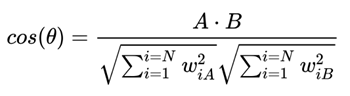

In [33]:
def CalcularCos(A,B):
  AdotB = np.dot(A,B)

  sA=0
  for i in range(len(A)):
    sA += A[i]*A[i]
  sA = pow(sA,0.5)

  sB=0
  for i in range(len(B)):
    sB += B[i]*B[i]
  sB = pow(sB,0.5)

  return AdotB / (sA*sB)

In [34]:
def CalcularCos(A,B):
  return np.dot(A,B)/((np.sqrt((A**2).sum()))*(np.sqrt((B**2).sum())))

In [35]:
CalcularCos(v1[0,:],v1[0,:])

1.0

In [36]:
preguntas[0]

'Is there a SIM card in it?'

In [37]:
v2 = xencoder.transform(["is thera any SIM card in it?"]).toarray()

In [38]:
CalcularCos(v1[0,:],v2[0,:])

0.7327987004737375

In [39]:
xvector.shape[0]

85865

In [40]:
max_id = -1
max_cos = 0
for i in range(xvector.shape[0]):
  v = xvector[i,:].toarray()
  c = CalcularCos(v[0,:],v2[0,:])
  if c > max_cos:
    max_cos = c
    max_id = i
print(respuestas[max_id])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Yes it does...i have a AT&T card prepaid
